In [1]:
import numpy as np
import Load_ActionsDataset
import cv2

dict_keys(['action_mad', 'force_mad', 'action_cup_and_mad', 'action_n_force_cup_and_mad', 'action_stone_and_mad', 'action_n_force_stone_and_mad', 'action_sponge_and_mad', 'action_n_force_sponge_and_mad', 'action_spoon_and_mad', 'action_n_force_spoon_and_mad', 'action_knife_and_mad', 'action_n_force_knife_and_mad', 'action_cup_fer_mad', 'action_n_force_cup_fer_mad', 'action_stone_fer_mad', 'action_n_force_stone_fer_mad', 'action_sponge_fer_mad', 'action_n_force_sponge_fer_mad', 'action_spoon_fer_mad', 'action_n_force_spoon_fer_mad', 'action_knife_fer_mad', 'action_n_force_knife_fer_mad', 'action_cup_gui_mad', 'action_n_force_cup_gui_mad', 'action_stone_gui_mad', 'action_n_force_stone_gui_mad', 'action_sponge_gui_mad', 'action_n_force_sponge_gui_mad', 'action_spoon_gui_mad', 'action_n_force_spoon_gui_mad', 'action_knife_gui_mad', 'action_n_force_knife_gui_mad', 'action_cup_mic_mad', 'action_n_force_cup_mic_mad', 'action_stone_mic_mad', 'action_n_force_stone_mic_mad', 'action_sponge_mic_m

# Dataset Actions

In [2]:
mad= Load_ActionsDataset.load_dataset_mad(spec='xfy')   #Lista con 4 elementos: video, fuerza, etiqueta, metadata
haf = Load_ActionsDataset.load_dataset_haf(spec='xfy')  #Lista con 4 elementos: video, fuerza, etiqueta, metadata

reading datasets:
    using objects: ['cup', 'stone', 'sponge', 'spoon', 'knife']
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/cup_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/stone_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/sponge_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/spoon_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/MAD/knife_db.json
Done
reading datasets:
    using objects: ['cup', 'fork', 'knife', 'sponge']
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/HAF/fbr_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset/HAF/fbr2_db.json
loading data: /Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/Actions_Dataset

In [3]:
clases, reps = np.unique( np.array(mad[2]),return_counts = True)
for valor, cant in zip(clases,reps):
    print(' El valor', valor, 'se repite', cant, ' veces')
#Hay 25 valores debido a las 25 clases que tiene el dataset mad

 El valor 0 se repite 25  veces
 El valor 1 se repite 25  veces
 El valor 2 se repite 25  veces
 El valor 3 se repite 25  veces
 El valor 4 se repite 25  veces
 El valor 5 se repite 27  veces
 El valor 6 se repite 27  veces
 El valor 7 se repite 27  veces
 El valor 8 se repite 27  veces
 El valor 9 se repite 27  veces
 El valor 10 se repite 25  veces
 El valor 11 se repite 25  veces
 El valor 12 se repite 25  veces
 El valor 13 se repite 26  veces
 El valor 14 se repite 24  veces
 El valor 15 se repite 25  veces
 El valor 16 se repite 25  veces
 El valor 17 se repite 25  veces
 El valor 18 se repite 25  veces
 El valor 19 se repite 25  veces
 El valor 20 se repite 25  veces
 El valor 21 se repite 25  veces
 El valor 22 se repite 25  veces
 El valor 23 se repite 25  veces
 El valor 24 se repite 25  veces


In [30]:
mad[0][0].shape

(117, 4096)

In [5]:
example_vid = mad[0][0].copy()
example_vid = np.reshape(example_vid,(117,64,64),order='C')
example_vid = (example_vid - example_vid.min())/(example_vid.max()-example_vid.min())*255
example_vid = example_vid.astype(np.uint8)
print(example_vid.max())

255


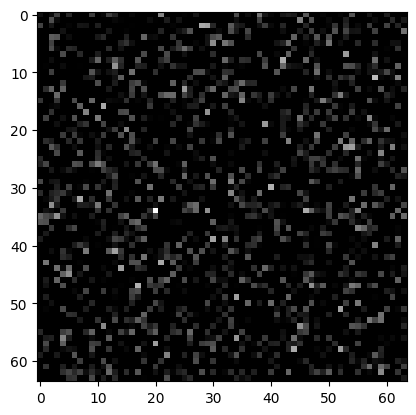

In [39]:
import matplotlib.pyplot as plt
plt.imshow(mad[0][20][10].reshape(64,64),'gray')

In [31]:
size = example_vid[0].shape
output_filename = "video_prueba.mp4"

# Crear un objeto VideoWriter con el nombre de archivo de salida, el códec, la tasa de fotogramas y las dimensiones del video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec para formato MP4
fps = 15  # Tasa de fotogramas por segundo
output_video = cv2.VideoWriter(output_filename, fourcc, fps, size,isColor=False)

array = np.random.randint(0, 256, size=(114, 64, 64), dtype=np.uint8)
# Iterar sobre cada frame en la matriz y escribirlo en el video
for frame in example_vid:
    output_video.write(frame)

# Liberar recursos y cerrar el archivo de video
output_video.release()

In [7]:
# Define las dimensiones del video y el nombre del archivo de salida
width, height = 64, 64
output_file = 'video_salida_2.mp4'

# Inicializa el objeto VideoWriter de OpenCV
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_file, fourcc, 30.0, (width, height))

# Itera sobre cada frame del numpy array y escribe el frame en el video
for frame in example_vid:
    # Redimensiona el frame al tamaño deseado
    frame = frame.reshape((width, height))
    
    # Convierte el frame en un objeto de imagen (para OpenCV)
    frame_img = cv2.cvtColor(frame, cv2.COLOR_GRAY2RGB)
    
    # Escribe el frame en el video
    out.write(frame_img)

# Liberar recursos
out.release()


In [8]:
mad[3][0]

{'sub_id': 4,
 'subject': 'and',
 'object': 'cup',
 'segment_id': 0,
 'start_frame': 45,
 'touch_frame': 84,
 'end_frame': 161,
 'start_fid': 0,
 'touch_fid': 39,
 'end_fid': 116,
 'seq_len': 117,
 'preseq_len': 40,
 'attention_type': 1,
 'test_flag': False}

In [9]:
print(mad[1][4].shape)

(102, 4)


# Dataset DVS_gesture

In [1]:
import torch
import sys
import torch.nn.functional as F
import wandb
from spikingjelly.activation_based import functional, surrogate, neuron
from spikingjelly.activation_based.model import parametric_lif_net
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
from spikingjelly.datasets import play_frame
from torch.utils.tensorboard import SummaryWriter
import time
import os
import datetime

#Localización del dataset de DVSGesture
data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
#Time-step
T = 16
#Número de épocas
start_epoch, epochs = 0, 30
train_set = DVS128Gesture(root=data_dir, train=True, data_type='frame', frames_number=T, split_by='number')
test_set = DVS128Gesture(root=data_dir, train=False, data_type='frame', frames_number=T, split_by='number')

play_frame(train_set[0][0],save_gif_to=os.path.join(os.getcwd(),'prueba.gif'))

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/prueba.gif].


In [11]:
train_set[0][0].max()

41.0

Esto no me funciona:

In [12]:
example_vid_2 = train_set[0][0].copy()

size = example_vid_2[0].shape[-2:]
output_filename = "video_prueba_2.mp4"

# Crear un objeto VideoWriter con el nombre de archivo de salida, el códec, la tasa de fotogramas y las dimensiones del video
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec para formato MP4
fps = 2  # Tasa de fotogramas por segundo
output_video = cv2.VideoWriter(output_filename, fourcc, fps, size)

# Iterar sobre cada frame en la matriz y escribirlo en el video
for frame in example_vid_2:
    frame_bgr = np.zeros((size[0],size[1],3),dtype = np.uint8)
    frame_bgr[:,:,1] = frame[0,:,:]
    frame_bgr[:,:,2] = frame[1,:,:]
    output_video.write(frame_bgr)

# Liberar recursos y cerrar el archivo de video
output_video.release()

In [13]:
pwd = os.getcwd()
print(os.path.join(pwd,'hola','hola2'))

/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/hola/hola2


In [11]:
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
root = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/extract/DvsGesture/user01_fluorescent.aedat'
k_gesture = DVS128Gesture.load_origin_data(root)

In [14]:
k_gesture['t']

array([ 80046394,  80046412,  80046414, ..., 194216337, 194216353,
       194216418])

# Dataset Animals DVS

In [15]:
import spikingjelly.datasets

aedat_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/extract/Animals'
k = 0
for archivo in os.listdir(aedat_dir):
    if archivo.endswith('.aedat'):
        print(k,archivo,end='\n\n')
        k += 1
print(k)

0 user00_indoor.aedat

1 user07_indoor.aedat

2 user20_sunlight.aedat

3 user12_indoor.aedat

4 user30_imse.aedat

5 user15_indoor.aedat

6 user47_dc.aedat

7 user46_dc.aedat

8 user29_imse.aedat

9 user21_sunlight.aedat

10 user14_indoor.aedat

11 user13_indoor.aedat

12 user06_indoor.aedat

13 user50_dc.aedat

14 user51_dc.aedat

15 user01_indoor.aedat

16 user24_sunlight.aedat

17 user32_imse.aedat

18 user57_dc.aedat

19 user56_dc.aedat

20 user23_sunlight.aedat

21 user22_sunlight.aedat

22 user37_dc.aedat

23 user36_dc.aedat

24 user26_imse.aedat

25 user40_dc.aedat

26 user41_dc.aedat

27 user28_imse.aedat

28 user53_dc.aedat

29 user52_dc.aedat

30 user34_imse.aedat

31 user08_indoor.aedat

32 user19_sunlight.aedat

33 user25_imse.aedat

34 user59_dc.aedat

35 user58_dc.aedat

36 user09_indoor.aedat

37 user44_dc.aedat

38 user45_dc.aedat

39 user18_sunlight.aedat

40 user39_dc.aedat

41 user38_dc.aedat

42 user31_imse.aedat

43 user35_dc.aedat

44 user43_dc.aedat

45 user42_dc

In [29]:
from Datasets import DVSAnimals

data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset'
T=16
data = DVSAnimals(data_dir,train=True, data_type='frame', frames_number=T, split_by='number')

Starting new version
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/frames_number_16_split_by_number] already exists.


In [30]:
len(data.classes)

19

In [9]:
data[0][0].shape

(10, 2, 128, 128)

In [7]:
data[0][0].shape

(10, 2, 128, 128)

In [3]:
labels = [sample[1] for sample in data]

In [4]:
import numpy as np
import random
from sklearn.model_selection import train_test_split
seed = 310
random.seed(seed)
np.random.seed(seed)
data_train, data_test = train_test_split(data, test_size = 0.2,stratify = np.array(labels),random_state=seed)

In [5]:
data_train2, data_test2 = train_test_split(data, test_size = 0.2,stratify = np.array(labels),random_state=seed)

In [6]:
np.all(np.array([sample[1] for  sample in data_train2]) == np.array([sample[1] for sample in data_train]))

True

In [48]:
labels_train = [sample[1] for sample in data_train]
labels_test = [sample[1] for sample in data_test]

In [49]:
print(np.unique(labels_train,return_counts=True))
print(np.unique(labels_test,return_counts=True))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([47, 47, 47, 47, 47, 48, 47, 47, 47, 47, 47, 47, 47, 47, 48, 47, 47,
       48, 47]))
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18]), array([12, 12, 12, 12, 12, 11, 12, 12, 12, 12, 12, 12, 12, 12, 11, 12, 12,
       11, 12]))


In [28]:
from spikingjelly.datasets.dvs128_gesture import DVS128Gesture
data_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset'
test_set = DVS128Gesture(root=data_dir, train=False, data_type='frame', frames_number=16, split_by='number')
print(len(test_set.classes))

The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_Gesture_dataset/frames_number_16_split_by_number] already exists.
11


In [19]:
from spikingjelly.datasets import play_frame
import os

play_frame(data[20][0],save_gif_to=os.path.join(os.getcwd(),'prueba_final.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/prueba_final.gif].


In [9]:
k2[1]

array([( 72,  57, 2249370501, False), (111,  70, 2249370502, False),
       ( 89,  55, 2249370503, False), ..., ( 46, 123, 2381441170, False),
       ( 38, 109, 2381441217, False), ( 14,  89, 2381441305, False)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('t', '<i8'), ('p', '?')])

In [6]:
k['t']*1e-3

array([2242581.126, 1851326.464, 2276135.558, ..., 4008178.061,
       4130209.792, 3253268.877])

In [1]:
from Animals import DVSAnimals
example_aedat = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/extract/Animals/user00_indoor.aedat'
example_csv = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/SLAnimals_Dataset/extract/Animals/user00_indoor.csv'
DVSAnimals.split_aedat_files_to_np('prueba',example_aedat,example_csv,'fa')

/Users/marcosesquivelgonzalez/pyenviroments/tfm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start to split [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/extract/Animals/user00_indoor.aedat] to samples.


FileNotFoundError: [Errno 2] No such file or directory: 'fa/0/prueba_0.npz'

In [21]:
from spikingjelly import datasets
k_frames = datasets.integrate_events_by_fixed_frames_number(k,split_by = 'number',frames_num = 8,H=128,W = 128)

In [22]:
import numpy as np
np.unique(data[10][0])

array([0.], dtype=float32)

Implementación github SensorsINI:

In [1]:
import struct
import os

V3 = "aedat3"
V2 = "aedat"  # current 32bit file format
V1 = "dat"  # old format

EVT_DVS = 0  # DVS event type
EVT_APS = 1  # APS event


def loadaerdat(datafile='/tmp/aerout.dat', length=0, version=V2, debug=1, camera='DVS128'):
    """    
    load AER data file and parse these properties of AE events:
    - timestamps (in us), 
    - x,y-position [0..127]
    - polarity (0/1)

    @param datafile - path to the file to read
    @param length - how many bytes(B) should be read; default 0=whole file
    @param version - which file format version is used: "aedat" = v2, "dat" = v1 (old)
    @param debug - 0 = silent, 1 (default) = print summary, >=2 = print all debug
    @param camera='DVS128' or 'DAVIS240'
    @return (ts, xpos, ypos, pol) 4-tuple of lists containing data of all events;
    """
    # constants
    aeLen = 8  # 1 AE event takes 8 bytes
    readMode = '>II'  # struct.unpack(), 2x ulong, 4B+4B
    td = 0.000001  # timestep is 1us   
    if(camera == 'DVS128'):
        xmask = 0x00fe
        xshift = 1
        ymask = 0x7f00
        yshift = 8
        pmask = 0x1
        pshift = 0
    elif(camera == 'DAVIS240'):  # values take from scripts/matlab/getDVS*.m
        xmask = 0x003ff000
        xshift = 12
        ymask = 0x7fc00000
        yshift = 22
        pmask = 0x800
        pshift = 11
        eventtypeshift = 31
    else:
        raise ValueError("Unsupported camera: %s" % (camera))

    if (version == V1):
        print ("using the old .dat format")
        aeLen = 6
        readMode = '>HI'  # ushot, ulong = 2B+4B

    aerdatafh = open(datafile, 'rb')
    k = 0  # line number
    p = 0  # pointer, position on bytes
    statinfo = os.stat(datafile)
    if length == 0:
        length = statinfo.st_size    
    print ("file size", length)
    
    # header
    lt = aerdatafh.readline()
    while lt and lt[0] == "#":
        p += len(lt)
        k += 1
        lt = aerdatafh.readline() 
        if debug >= 2:
            print (str(lt))
        continue
    
    # variables to parse
    timestamps = []
    xaddr = []
    yaddr = []
    pol = []
    
    # read data-part of file
    aerdatafh.seek(p)
    s = aerdatafh.read(aeLen)
    p += aeLen
    
    print (xmask, xshift, ymask, yshift, pmask, pshift)    
    while p < length:
        addr, ts = struct.unpack(readMode, s)
        # parse event type
        if(camera == 'DAVIS240'):
            eventtype = (addr >> eventtypeshift)
        else:  # DVS128
            eventtype = EVT_DVS
        
        # parse event's data
        if(eventtype == EVT_DVS):  # this is a DVS event
            x_addr = (addr & xmask) >> xshift
            y_addr = (addr & ymask) >> yshift
            a_pol = (addr & pmask) >> pshift


            if debug >= 3: 
                print("ts->", ts)  # ok
                print("x-> ", x_addr)
                print("y-> ", y_addr)
                print("pol->", a_pol)

            timestamps.append(ts)
            xaddr.append(x_addr)
            yaddr.append(y_addr)
            pol.append(a_pol)
                  
        aerdatafh.seek(p)
        s = aerdatafh.read(aeLen)
        p += aeLen        

    if debug > 0:
        try:
            print ("read %i (~ %.2fM) AE events, duration= %.2fs" % (len(timestamps), len(timestamps) / float(10 ** 6), (timestamps[-1] - timestamps[0]) * td))
            n = 5
            print ("showing first %i:" % (n))
            print ("timestamps: %s \nX-addr: %s\nY-addr: %s\npolarity: %s" % (timestamps[0:n], xaddr[0:n], yaddr[0:n], pol[0:n]))
        except:
            print ("failed to print statistics")

    return timestamps, xaddr, yaddr, pol

### Prueba repositorio de git https://github.com/ronichester/SL-animals-DVS-stbp/tree/main

In [2]:
import numpy as np
root_example = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/prueba_git/SL-animals-DVS-stbp/data/sliced_recordings/user00_indoor_00.npy'
prueba = np.load(root_example)

In [3]:
prueba

array([(93, 93, 2276110031,  True), (73, 81, 2276110135,  True),
       (91, 70, 2276110146,  True), ..., (75, 13, 2277514687, False),
       (76, 69, 2277514698,  True), (67, 46, 2277514723,  True)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('t', '<i8'), ('p', '?')])

In [4]:
root_final = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/events_np/train/0/user00_indoor_0.npz'
prueba_final = np.load(root_final)

In [5]:
import pandas as pd
import tonic

example_aedat = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/extract/Animals/user00_indoor.aedat'
example_csv = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Datasets/SLAnimals_Dataset/extract/Animals/user00_indoor.csv'
sensor_shape, events = tonic.io.read_dvs_128(example_aedat)
#read the tag file
tagfile = pd.read_csv(example_csv)  #df

#define event boundaries for each class
events_start = list(tagfile["startTime_ev"])
events_end = list(tagfile["endTime_ev"])

#create a list of arrays, separating the recording in 19 slices
sliced_events = tonic.slicers.slice_events_at_indices(events, 
                                                        events_start, 
                                                        events_end)

In [12]:
sliced_events[0]

array([(93, 93, 2276110031,  True), (73, 81, 2276110135,  True),
       (91, 70, 2276110146,  True), ..., (75, 13, 2277514687, False),
       (76, 69, 2277514698,  True), (67, 46, 2277514723,  True)],
      dtype=[('x', '<i2'), ('y', '<i2'), ('t', '<i8'), ('p', '?')])

In [22]:
from spikingjelly.datasets import play_frame
import os
from spikingjelly import datasets
k_frames = datasets.integrate_events_by_fixed_frames_number(sliced_events[9],split_by = 'number',frames_num = 10,H=128,W = 128)

play_frame(k_frames,save_gif_to=os.path.join(os.getcwd(),'prueba2.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/Projects/prueba2.gif].


In [14]:
k_frames.shape

(8, 2, 128, 128)

# DailyActions dataset

In [26]:
data.classes

['bend',
 'climb',
 'fall',
 'get up',
 'jump',
 'lie',
 'lift',
 'pick',
 'run',
 'sit',
 'stand',
 'walk']

In [32]:
from Datasets import DVSDailyActions
Daily_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset'
T = 16
data = DVSDailyActions(Daily_dir,train=True, data_type='frame', frames_number=T, split_by='number')

Starting new version
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_DailyAction_dataset/frames_number_16_split_by_number] already exists.


In [33]:
len(data.classes)

12

In [25]:
data.class_to_idx

{'bend': 0,
 'climb': 1,
 'fall': 2,
 'get up': 3,
 'jump': 4,
 'lie': 5,
 'lift': 6,
 'pick': 7,
 'run': 8,
 'sit': 9,
 'stand': 10,
 'walk': 11}

In [16]:
import numpy as np
labels =  np.array([sample[1] for sample in data])
print(np.unique(labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11]


In [19]:
np.where(labels == 4)

(array([480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492,
        493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
        506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
        519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
        532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544,
        545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557,
        558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570,
        571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583,
        584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595, 596,
        597, 598, 599]),)

In [10]:
data.class_to_idx

{'arm crossing': 0,
 'get-up': 1,
 'jumping': 2,
 'kicking': 3,
 'picking up': 4,
 'sit-down': 5,
 'throwing': 6,
 'turning around': 7,
 'walking': 8,
 'waving': 9}

In [9]:
import os
from spikingjelly.datasets import play_frame

play_frame(data[230][0],save_gif_to=os.path.join(os.getcwd(),'prueba_action_recog.gif'))

Save frames to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/src/prueba_action_recog.gif].


In [5]:
from Datasets import DVSActionRecog, DVSDailyActions
AR_dir = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset'
T = 16
data = DVSActionRecog(AR_dir,train=True, data_type='frame', frames_number=T, split_by='number')

The [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/download] directory for saving downloaded files already exists, check files...
The directory [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/extract] for saving extracted files already exists.
SpikingJelly will not check the data integrity of extracted files.
If extracted files are not integrated, please delete [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/extract] manually, then SpikingJelly will re-extract files from [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/download].
Mkdir [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np].
Start to convert the origin data from [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/extract] to [/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_d

In [17]:
import numpy as np
k = np.load('/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/events_np/train/arm crossing/chenjieneng_1.1.npz')
np.unique(k['p'])

array([0], dtype=uint32)

In [2]:
from Datasets import DVSActionRecog
import numpy as np
AR_example_aedat = '/Users/marcosesquivelgonzalez/Desktop/MasterCDatos/TFM/data/DVS_ActionRecog_dataset/extract/ActionRecognition/arm crossing/chenjieneng_1.1.aedat'
t = DVSActionRecog.load_origin_data(AR_example_aedat)
np.unique(t['p'])

Reading in at most 10000000000.0
file size 9093705


array([0., 1.])

In [28]:
import tonic 
t2 = DVSDailyActions.load_origin_data(AR_example_aedat)

In [34]:
t2['y'].max()

0